In [8]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nxviz import CircosPlot
from nxviz import MatrixPlot
from nxviz import ArcPlot
import community

Crear Grafo

In [9]:
G = nx.Graph()

In [10]:
# Añadir nodes (nodos) y edges (conexiones) al grafo
G.add_node(1)
G.add_nodes_from([2, 3])

G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])


We can calculate those with Networkx using the `order` or `number_of_nodes` methods to get the total nodes and the `size` or `number_of_edges` methods to get the total edges.

In [11]:
G.order()
G.number_of_nodes()

G.size()
G.number_of_edges()

2

We can retrieve the degree for each node in a graph by calling the `degree` method, so obtaining the average degree is just a matter of summing up all the degree values and then dividing by the number of nodes in the graph.

In [12]:
sum(dict(G.degree()).values())/G.order()

1.3333333333333333

Average distance is simply the average number of nodes you'll encounter getting between two nodes. Both can be computed as follows.

In [ ]:
nx.diameter(G)

nx.average_shortest_path_length(G)

# Analyzing Networks
Tamaño grafo

In [13]:
#Ver el tamaño del grafo
#Número de nodos en el grafo
G.order()
print(G.number_of_nodes())

#Número de edges en el grafo
G.size()
print(G.number_of_edges())

3
2


In [14]:
# Return: array con el node y el número de edges del nodo
print(G.degree())

# Return: diccionario con el node y el número de edges del nodo
dict(G.degree())

[(1, 2), (2, 1), (3, 1)]


{1: 2, 2: 1, 3: 1}

## Average degree
Grado promedio del grafo: indica el número de nodos promedio al que se puede llegar desde un no

In [15]:
sum(dict(G.degree()).values())/G.order()


1.3333333333333333

Density of the graph

In [16]:
# Average degree (grado promedio)/ nº de nodos en el gráfico
nx.density(G)

0.6666666666666666

Diameter and average distance

In [17]:
#Diámetro
print(nx.diameter(G))

#Distancia promedio
nx.average_shortest_path_length(G)

2


1.3333333333333333

## Node Centrality Metrics
Las métricas de centralidad de nodos nos dicen que nodos son los más importantes. 

In [18]:
betweenness = nx.betweenness_centrality(G, weight='edge')
print(betweenness)
closeness = nx.closeness_centrality(G, distance='edge')
print(closeness)
eigenvector = nx.eigenvector_centrality_numpy(G)
print(eigenvector)
degree = nx.degree_centrality(G)
print(degree)
pagerank = nx.pagerank(G)
print(pagerank)

{1: 1.0, 2: 0.0, 3: 0.0}
{1: 1.0, 2: 0.6666666666666666, 3: 0.6666666666666666}
{1: 0.7071067811865477, 2: 0.49999999999999994, 3: 0.49999999999999994}
{1: 1.0, 2: 0.5, 3: 0.5}
{1: 0.48648582432442095, 2: 0.25675708783778944, 3: 0.25675708783778944}


### Building and Analyzing Graphs from Tabular Data
Un dataset en formato tabular contiene filas que representan las entidades y transacciones o iteracciones y las columnas que representan atributos o características de las filas. Tenemos:

Entidades
Transacciones o iteraciones
Relaciones

In [19]:
gymnastics = pd.read_csv('data/us_womens_gymnastics.csv')
print(gymnastics.info())
display(gymnastics.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 4 columns):
Name_x    2866 non-null object
Name_y    2866 non-null object
Games     2866 non-null object
Event     2866 non-null object
dtypes: object(4)
memory usage: 89.6+ KB
None


,Name_x,Name_y,Games,Event
0,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Marian Emma Barone (Twining-),1948 Summer,Gymnastics Women's Team All-Around
1,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)","Consetta Anne ""Connie"" Caruccio-Lenz",1948 Summer,Gymnastics Women's Team All-Around
2,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Dorothy Katherine Dalton,1948 Summer,Gymnastics Women's Team All-Around
3,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Meta Elste (Neumann-),1948 Summer,Gymnastics Women's Team All-Around
4,"Ladislava Aloisie ""Laddie"" Bakanic (Hniz-)",Helen Mary Schifano (-Sjursen),1948 Summer,Gymnastics Women's Team All-Around


In [20]:
#G = nx.from_pandas_edgelist(df, source, target)
G = nx.from_pandas_edgelist(gymnastics, 'Name_x', 'Name_y')

In [21]:
#How many gymnasts (nodes) are in the graph?
G.order()

94

In [22]:
#How many edges are in the graph?
G.size()

292

In [23]:
#What is the average degree?
sum(dict(G.degree()).values())/G.order()

6.212765957446808

In [24]:
#What is the density of the graph?
nx.density(G)

0.06680393502630977

In [25]:
#Is this graph fully-connected? How do you know?
print(nx.is_connected(G))

False


In [26]:
betweenness = nx.betweenness_centrality(G, weight='edge')

In [27]:
# Definimos una función para que nos devuelva un diccionario convertido a lista y ordenado por los valores más altos.
def lis_dict(x):
    return list(reversed(sorted((value, node)for (node, value) in x.items())))

In [29]:
# What gymnast has the highest betweenness centrality?
# Linda Joan Metheny (-Mulvihill)
lis_dict(betweenness)[:6]

[(0.05002337540906966, 'Linda Joan Metheny (-Mulvihill)'),
 (0.04184198223468911, 'Muriel Evelyn Davis-Grossfeld'),
 (0.026881720430107527, 'Kimberly Ann Chace (-Boyle, -May)'),
 (0.017999064983637215, 'Consetta Anne "Connie" Caruccio-Lenz'),
 (0.006077606358111267, 'Dominique Margaux Dawes (-Thompson)'),
 (0.004207573632538569, 'Cathleen Roxanne "Cathy" Rigby (-Mason, -McCoy)')]

In [30]:
eigenvector = nx.eigenvector_centrality_numpy(G)

In [31]:
# What gymnast has the highest Eigenvector centrality?
# Meta Elste (Neumann-) and Marian Emma Barone (Twining-)
lis_dict(eigenvector)[:6]

[(0.33062594030121734, 'Marian Emma Barone (Twining-)'),
 (0.33062594030121734, 'Dorothy Katherine Dalton'),
 (0.3306259403012172, 'Meta Elste (Neumann-)'),
 (0.330625940301217, 'Clara Marie Schroth-Lomady'),
 (0.3179944910929597, 'Consetta Anne "Connie" Caruccio-Lenz'),
 (0.23909955168691802, 'Anita Aline Simonis (-Zetts)')]

In [32]:
degree = nx.degree_centrality(G)

In [33]:
# What gymnast has the highest degree centrality?
# Muriel Evelyn Davis-Grossfeld, Linda Joan Metheny (-Mulvihill) and Consetta Anne "Connie" Caruccio-Lenz')
lis_dict(degree)[:6]

[(0.15053763440860216, 'Muriel Evelyn Davis-Grossfeld'),
 (0.15053763440860216, 'Linda Joan Metheny (-Mulvihill)'),
 (0.15053763440860216, 'Consetta Anne "Connie" Caruccio-Lenz'),
 (0.13978494623655915, 'Dominique Margaux Dawes (-Thompson)'),
 (0.11827956989247312, 'Meta Elste (Neumann-)'),
 (0.11827956989247312, 'Marian Emma Barone (Twining-)')]

### Basketball

In [34]:
basketball = pd.read_csv('data/us_mens_basketball.csv')
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [35]:
def df_to_graph(df, entity, edge):
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]
    
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

In [36]:
df_basketball = df_to_graph(basketball, entity='Name', edge= 'Games')
df_basketball.head()

,Name_x,Name_y,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1


In [38]:
A = nx.from_pandas_edgelist(df=df_basketball, source='Name_x', target='Name_y', edge_attr='Games')

In [39]:
# How many basketball players (nodes) are in the graph?
A.order()

196

In [40]:
# How many edges are in the graph?
A.number_of_edges()

1232

In [41]:
# What is the average degree?
sum(dict(A.degree()).values())/G.order()

26.21276595744681

In [42]:
# What is the density of the graph?
print(nx.density(A))

0.06446886446886448


In [43]:
# Is this graph fully-connected? How do you know?
nx.is_connected(A)

False

In [44]:
# What player has the highest betweenness centrality?
betweenness_A = nx.betweenness_centrality(A, weight='edge')
lis_dict(betweenness_A)[:6]
# Gary Dwayne Payton

[(0.09193761564895586, 'Gary Dwayne Payton'),
 (0.09135606661379858, 'Jason Frederick Kidd'),
 (0.04742268041237115, 'Carmelo Kyan Anthony'),
 (0.03266190853819722, 'David Maurice Robinson'),
 (0.030240549828178694, 'William Marion "Bill" Hougland'),
 (0.024054982817869417, 'Robert Albert "Bob" Kurland')]

In [45]:
# What player has the highest Eigenvector centrality?
eigenvector_A = nx.eigenvector_centrality_numpy(A)
lis_dict(eigenvector_A)[:6]
# Carmelo Kyan Anthony

[(0.34185005667190754, 'Carmelo Kyan Anthony'),
 (0.28845352143158903, 'LeBron Raymone James'),
 (0.22431681558531286, 'Deron Michael Williams'),
 (0.22431681558531272, 'Christopher Emmanuel "Chris" Paul'),
 (0.2243168155853127, 'Kobe Bean Bryant'),
 (0.22195694763560436, 'Carlos Austin Boozer, Jr.')]

In [46]:
# What player has the highest degree centrality?
degree_A = nx.degree_centrality(A)
lis_dict(degree_A)[:6]
#Carmelo Kyan Anthony

[(0.18461538461538463, 'Carmelo Kyan Anthony'),
 (0.14358974358974358, 'David Maurice Robinson'),
 (0.13333333333333333, 'Robert Albert "Bob" Kurland'),
 (0.13333333333333333, 'LeBron Raymone James'),
 (0.12307692307692308, 'William Marion "Bill" Hougland'),
 (0.11282051282051282, 'Jason Frederick Kidd')]

## Visualization of Network Data¶


/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


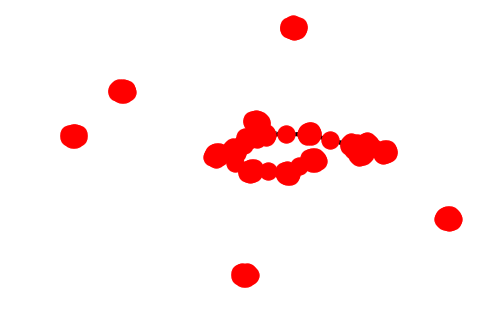

In [47]:
nx.draw(A)

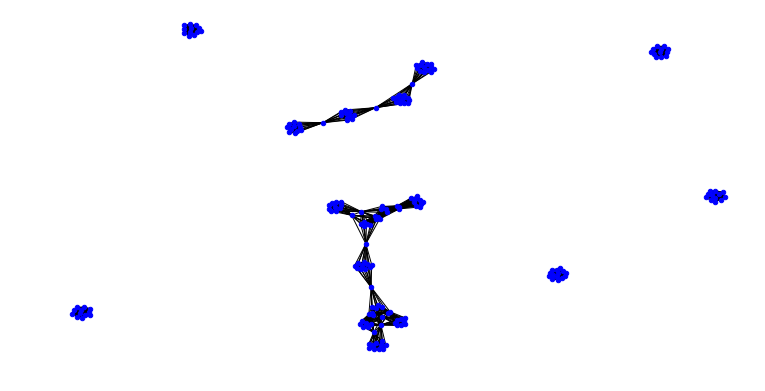

In [48]:
plt.figure(figsize=(10,5))
nx.draw(A, node_size=20, node_color='blue')

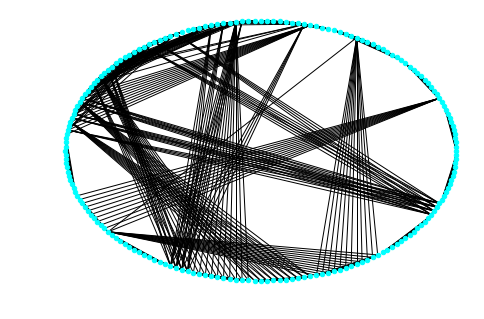

In [49]:
nx.draw_circular(A, node_size=20, node_color='cyan')

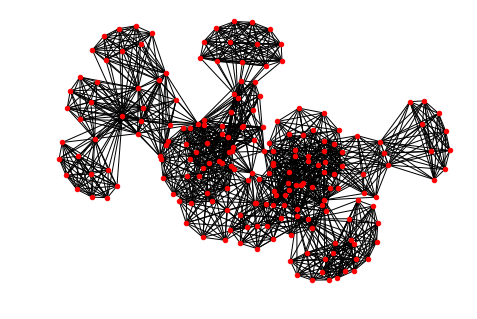

In [50]:
nx.draw_kamada_kawai(A, node_size=20, node_color='red')

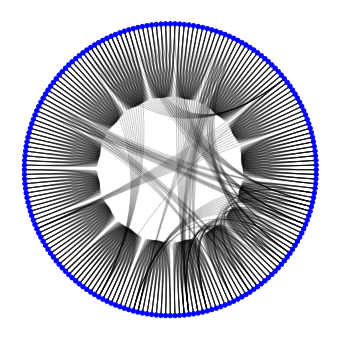

In [51]:
#Circos Plots
c = CircosPlot(A)
c.draw()

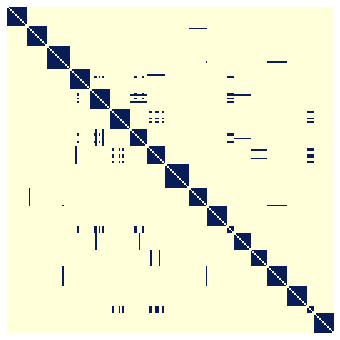

In [52]:
#Matrix Plots
m = MatrixPlot(A)
m.draw()

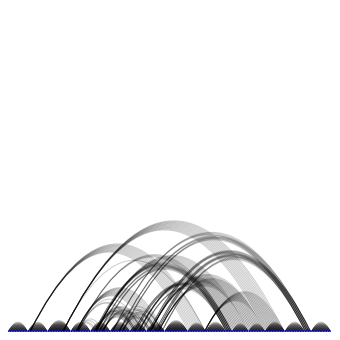

In [53]:
#Arc Plots
a = ArcPlot(A)
a.draw()

## Bar Chart

In [54]:
df_basketball.head()

,Name_x,Name_y,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1


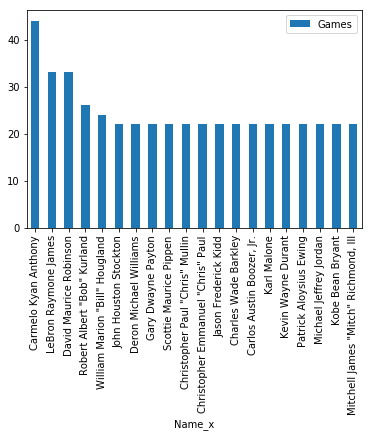

In [55]:
a = df_basketball.groupby('Name_x').agg(sum).sort_values(['Games'],ascending=False).iloc[:20]
a.plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1202a0cc0>]],
      dtype=object)

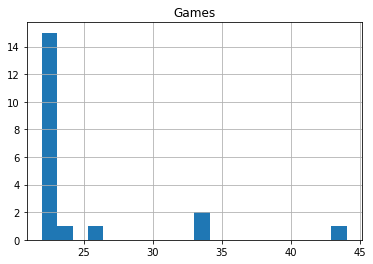

In [56]:
a.hist(bins=20)

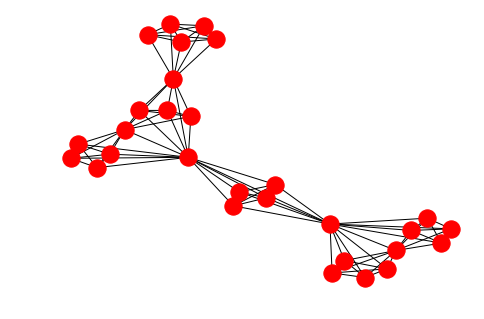

In [57]:
ego = nx.ego_graph(G, 'Linda Joan Metheny (-Mulvihill)', radius=25)
nx.draw(ego)

# Community Detection

In [58]:
import community
parts = community.best_partition(G)
parts

AttributeError: module 'community' has no attribute 'best_partition'

### Hierarchical Graphs

In [59]:
#G = nx.from_pandas_edgelist(men,source='Games', target='Name')
#nx.draw(G)

basket = df_to_graph(men, entity='Games', edge='Name')
basket.head()

B3 = nx.from_pandas_edgelist(basketball3, 
                            source='Games_x', 
                            target='Games_y', 
                            edge_attr='Name')
nx.draw_kamada_kawai(B3, node_size=30, with_labels=True)

#Alberto's copyright


NameError: name 'men' is not defined